In [1]:
import matplotlib
matplotlib.use('agg')  # allows notebook to be tested in Travis

import pandas as pd
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import pandana as pdna
import time

import urbanaccess as ua
from urbanaccess.config import settings
from urbanaccess.gtfsfeeds import feeds
from urbanaccess import gtfsfeeds
from urbanaccess.gtfs.gtfsfeeds_dataframe import gtfsfeeds_dfs
from urbanaccess.network import ua_network, load_network

%matplotlib inline

In [18]:
settings.log_console = False

In [3]:
feeds.to_dict()

{'gtfs_feeds': {}}

In [4]:
gtfsfeeds.search(search_text='Bay Area Rapid Transit',
                 search_field=None,
                 match='contains')

Note: Your use of a GTFS feed is governed by each GTFS feed author license terms. It is suggested you read the respective license terms for the appropriate use of a GTFS feed.
Found 1 records that matched ['Bay Area Rapid Transit'] inside ['name', 'url', 'dataexchange_id', 'feed_baseurl'] columns:


date_last_updated                                   dataexchange_url  \
114 2016-04-04 02:31:19  http://www.gtfs-data-exchange.com/agency/bay-a...   

             date_added  is_official  \
114 2007-05-14 15:49:05         True   

                                  feed_baseurl                    name  \
114  http://www.bart.gov/schedules/developers/  Bay Area Rapid Transit   

                       area                   url        country       state  \
114  San Francisco Bay Area  http://www.bart.gov/  United States  California   

                                       license_url         dataexchange_id  
114  http://www.bart.gov/dev/schedules/license.htm  bay-area-rapid-transit

In [5]:
gtfsfeeds.search(search_text='Bay Area Rapid Transit',
                 search_field=None,
                 match='contains',
                 add_feed=True)

Note: Your use of a GTFS feed is governed by each GTFS feed author license terms. It is suggested you read the respective license terms for the appropriate use of a GTFS feed.
Found 1 records that matched ['Bay Area Rapid Transit'] inside ['name', 'url', 'dataexchange_id', 'feed_baseurl'] columns:
Added 1 feeds to gtfs_feeds: {'Bay Area Rapid Transit': 'http://www.gtfs-data-exchange.com/agency/bay-area-rapid-transit/latest.zip'}
Added 1 records to gtfs_feed list:


{'Bay Area Rapid Transit': 'http://www.gtfs-data-exchange.com/agency/bay-area-rapid-transit/latest.zip'}

In [6]:
feeds.add_feed(add_dict={'ac transit': 'http://www.actransit.org/wp-content/uploads/GTFSJune182017B.zip'})

Added 1 feeds to gtfs_feeds: {'ac transit': 'http://www.actransit.org/wp-content/uploads/GTFSJune182017B.zip'}


In [7]:
feeds.to_dict()

{'gtfs_feeds': {'Bay Area Rapid Transit': 'http://www.gtfs-data-exchange.com/agency/bay-area-rapid-transit/latest.zip',
  'ac transit': 'http://www.actransit.org/wp-content/uploads/GTFSJune182017B.zip'}}

In [8]:
gtfsfeeds.download()

data\gtfsfeed_zips does not exist. Directory was created
2 GTFS feed(s) will be downloaded here: data\gtfsfeed_zips
Bay Area Rapid Transit GTFS feed downloaded successfully. Took 1.23 seconds for 343,657.0KB
ac transit GTFS feed downloaded successfully. Took 24.06 seconds for 11,468,341.0KB
GTFS feed download completed. Took 25.29 seconds
data\gtfsfeed_text does not exist. Directory was created
ac transit.zip successfully extracted to: data\gtfsfeed_text\ac transit
Bay Area Rapid Transit.zip successfully extracted to: data\gtfsfeed_text\Bay Area Rapid Transit
GTFS feed zipfile extraction completed. Took 0.24 seconds for 2 files


In [9]:
validation = True
verbose = True
# bbox for City of Oakland
bbox = (-122.355881,37.632226,-122.114775,37.884725)
remove_stops_outsidebbox = True
append_definitions = True

loaded_feeds = ua.gtfs.load.gtfsfeed_to_df(gtfsfeed_path=None,
                                           validation=validation,
                                           verbose=verbose,
                                           bbox=bbox,
                                           remove_stops_outsidebbox=remove_stops_outsidebbox,
                                           append_definitions=append_definitions)

Checking GTFS text file header whitespace... Reading files using encoding: utf-8 set in configuration.
GTFS text file header whitespace check completed. Took 0.25 seconds
--------------------------------
Processing GTFS feed: ac transit
The unique agency id: ac_transit was generated using the name of the agency in the agency.txt file.
Unique agency id operation complete. Took 0.06 seconds
Unique GTFS feed id operation complete. Took 0.01 seconds
Records:
         stop_id                         stop_name   stop_lat    stop_lon  \
195      0200010       Bayside Common Condominiums  37.896314 -122.308150   
196      0200030            Buchanan St:Jackson St  37.887757 -122.300790   
197      0200040            Buchanan St:Jackson St  37.887509 -122.301187   
198      0200050             Buchanan St:Pierce St  37.887582 -122.305140   
199      0200060               Buchanan St:Polk St  37.887683 -122.302584   
...          ...                               ...        ...         ...   
49

In [10]:
loaded_feeds.stops.head()

stop_id                     stop_name   stop_lat    stop_lon  stop_code  \
0  0100060             8th St:Portola Av  37.768814 -122.272992    52246.0   
1  0100070             8th St:Portola Av  37.768993 -122.272798    57793.0   
2  0100110             Atlantic Av:#1105  37.780272 -122.264015    56707.0   
3  0100170     Atlantic Av:Challenger Dr  37.781066 -122.270060    57796.0   
4  0100180  Atlantic Av:Constitution Way  37.779879 -122.275281    50101.0   

   location_type parent_station unique_agency_id unique_feed_id  route_type  \
0            NaN            NaN       ac_transit   ac_transit_1         3.0   
1            NaN            NaN       ac_transit   ac_transit_1         3.0   
2            NaN            NaN       ac_transit   ac_transit_1         3.0   
3            NaN            NaN       ac_transit   ac_transit_1         3.0   
4            NaN            NaN       ac_transit   ac_transit_1         3.0   

   stop_desc zone_id stop_url  stop_timezone  wheelchair_boarding  \
0        NaN     NaN      NaN            NaN                  NaN   
1        NaN     NaN      NaN            NaN                  NaN   
2        NaN     NaN      NaN            NaN                  NaN   
3        NaN     NaN      NaN            NaN                  NaN   
4        NaN     NaN      NaN            NaN                  NaN   

  location_type_desc wheelchair_boarding_desc  
0               None                     None  
1               None                     None  
2               None                     None  
3               None                     None  
4               None                     None

In [11]:
loaded_feeds.stops.unique_agency_id.unique()

array(['ac_transit', 'bay_area_rapid_transit'], dtype=object)

<AxesSubplot:xlabel='stop_lon', ylabel='stop_lat'>

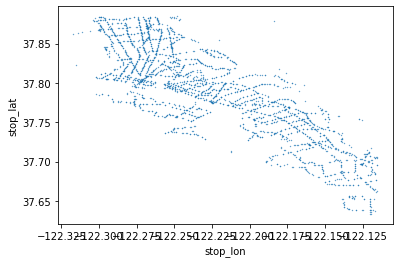

In [12]:
loaded_feeds.stops.plot(kind='scatter', x='stop_lon', y='stop_lat', s=0.1)

In [13]:
loaded_feeds.routes.head()

agency_id route_id route_short_name  \
0  AC Transit    1-141                1   
1  AC Transit   10-141               10   
2  AC Transit   12-141               12   
3  AC Transit   14-141               14   
4  AC Transit   18-141               18   

                                route_long_name  route_type unique_agency_id  \
0                San Leandro Bart- Dtn. Oakland           3       ac_transit   
1               San Leandro BART - Hayward BART           3       ac_transit   
2  Dtn. Oakland /Dtn. Berkeley/4th St. Harrison           3       ac_transit   
3                      W.OAKLAND/FRUITVALE BART           3       ac_transit   
4      San Pablo & Monroe/Berkeley/Merritt BART           3       ac_transit   

  unique_feed_id  route_desc route_url route_color  route_text_color  \
0   ac_transit_1         NaN       NaN         NaN               NaN   
1   ac_transit_1         NaN       NaN         NaN               NaN   
2   ac_transit_1         NaN       NaN         NaN               NaN   
3   ac_transit_1         NaN       NaN         NaN               NaN   
4   ac_transit_1         NaN       NaN         NaN               NaN   

  route_type_desc  
0             Bus  
1             Bus  
2             Bus  
3             Bus  
4             Bus

In [14]:
loaded_feeds.stop_times.head()

trip_id  stop_id arrival_time departure_time  \
0  5458754-1706SU-D4-Saturday-01  1009500     06:05:00       06:05:00   
1  5458754-1706SU-D4-Saturday-01  1007030     06:08:00       06:08:00   
2  5458754-1706SU-D4-Saturday-01  1015180          NaN                  
3  5458754-1706SU-D4-Saturday-01  1015000          NaN                  
4  5458754-1706SU-D4-Saturday-01  1014390          NaN                  

   stop_sequence  pickup_type  drop_off_type unique_agency_id unique_feed_id  \
0              1          NaN            NaN       ac_transit   ac_transit_1   
1              2          NaN            NaN       ac_transit   ac_transit_1   
2              3          NaN            NaN       ac_transit   ac_transit_1   
3              4          NaN            NaN       ac_transit   ac_transit_1   
4              5          NaN            NaN       ac_transit   ac_transit_1   

   route_type stop_headsign  shape_dist_traveled  timepoint pickup_type_desc  \
0           3           NaN                  NaN        NaN             None   
1           3           NaN                  NaN        NaN             None   
2           3           NaN                  NaN        NaN             None   
3           3           NaN                  NaN        NaN             None   
4           3           NaN                  NaN        NaN             None   

  drop_off_type_desc timepoint_desc  departure_time_sec  
0               None           None             21900.0  
1               None           None             22080.0  
2               None           None                 NaN  
3               None           None                 NaN  
4               None           None                 NaN

In [15]:
loaded_feeds.trips.head()

route_id                        trip_id             service_id  \
0   NL-141  5458754-1706SU-D4-Saturday-01  1706SU-D4-Saturday-01   
1   NL-141  5458755-1706SU-D4-Saturday-01  1706SU-D4-Saturday-01   
2   NL-141  5458756-1706SU-D4-Saturday-01  1706SU-D4-Saturday-01   
3   NL-141  5458757-1706SU-D4-Saturday-01  1706SU-D4-Saturday-01   
4   NL-141  5458758-1706SU-D4-Saturday-01  1706SU-D4-Saturday-01   

      trip_headsign  direction_id  block_id shape_id unique_agency_id  \
0  NL SAN FRANCISCO             1  770875.0   NL0006       ac_transit   
1  NL SAN FRANCISCO             1  770873.0   NL0006       ac_transit   
2  NL SAN FRANCISCO             1  770857.0   NL0006       ac_transit   
3  NL SAN FRANCISCO             1  770857.0   NL0006       ac_transit   
4  NL SAN FRANCISCO             1  770875.0   NL0006       ac_transit   

  unique_feed_id wheelchair_accessible  bikes_allowed bikes_allowed_desc  \
0   ac_transit_1                   NaN            NaN               None   
1   ac_transit_1                   NaN            NaN               None   
2   ac_transit_1                   NaN            NaN               None   
3   ac_transit_1                   NaN            NaN               None   
4   ac_transit_1                   NaN            NaN               None   

  wheelchair_accessible_desc  
0                       None  
1                       None  
2                       None  
3                       None  
4                       None

In [16]:
loaded_feeds.calendar.head()

service_id  monday  tuesday  wednesday  thursday  friday  \
0         1706SU-D2-Saturday-02       0        0          0         0       0   
1           1706SU-D2-Sunday-02       0        0          0         0       0   
2          1706SU-D2-Weekday-20       1        1          1         1       1   
3  1706SU-D2-Weekday-20-0000100       0        0          0         0       1   
4          1706SU-D3-Weekday-20       1        1          1         1       1   

   saturday  sunday  start_date  end_date unique_agency_id unique_feed_id  
0         1       0    20170624  20170819       ac_transit   ac_transit_1  
1         0       1    20170618  20170813       ac_transit   ac_transit_1  
2         0       0    20170619  20170818       ac_transit   ac_transit_1  
3         0       0    20170619  20170818       ac_transit   ac_transit_1  
4         0       0    20170619  20170818       ac_transit   ac_transit_1

In [17]:
ua.gtfs.network.create_transit_net(gtfsfeeds_dfs=loaded_feeds,
                                   day='monday',
                                   timerange=['07:00:00', '10:00:00'],
                                   calendar_dates_lookup=None)

Using calendar to extract service_ids to select trips.
9 service_ids were extracted from calendar
7,552 trip(s) 42.95 percent of 17,582 total trip records were found in calendar for GTFS feed(s): ['ac transit', 'bay area rapid transit']
NOTE: If you expected more trips to have been extracted and your GTFS feed(s) have a calendar_dates file, consider utilizing the calendar_dates_lookup parameter in order to add additional trips based on information inside of calendar_dates. This should only be done if you know the corresponding GTFS feed is using calendar_dates instead of calendar to specify service_ids. When in doubt do not use the calendar_dates_lookup parameter.
7,552 of 17,582 total trips were extracted representing calendar day: monday. Took 0.05 seconds
Note: Processing may take a long time depending on the number of records. Total unique trips to assess: 6,236
Starting departure stop time interpolation...
Departure time records missing from trips following the specified schedule:

In [19]:
urbanaccess_net = ua.network.ua_network

In [20]:
urbanaccess_net.transit_edges.head()

node_id_from                   node_id_to  weight  \
0  FTVL_bay_area_rapid_transit  COLS_bay_area_rapid_transit     4.0   
1  COLS_bay_area_rapid_transit  SANL_bay_area_rapid_transit     4.0   
2  SANL_bay_area_rapid_transit  BAYF_bay_area_rapid_transit     3.0   
3  WOAK_bay_area_rapid_transit  LAKE_bay_area_rapid_transit     6.0   
4  LAKE_bay_area_rapid_transit  FTVL_bay_area_rapid_transit     3.0   

         unique_agency_id                 unique_trip_id  sequence  \
0  bay_area_rapid_transit  02DC10_bay_area_rapid_transit         1   
1  bay_area_rapid_transit  02DC10_bay_area_rapid_transit         2   
2  bay_area_rapid_transit  02DC10_bay_area_rapid_transit         3   
3  bay_area_rapid_transit  03DC10_bay_area_rapid_transit         1   
4  bay_area_rapid_transit  03DC10_bay_area_rapid_transit         2   

                                id  route_type            unique_route_id  \
0  02DC10_bay_area_rapid_transit_1           1  05_bay_area_rapid_transit   
1  02DC10_bay_area_rapid_transit_2           1  05_bay_area_rapid_transit   
2  02DC10_bay_area_rapid_transit_3           1  05_bay_area_rapid_transit   
3  03DC10_bay_area_rapid_transit_1           1  05_bay_area_rapid_transit   
4  03DC10_bay_area_rapid_transit_2           1  05_bay_area_rapid_transit   

  net_type  
0  transit  
1  transit  
2  transit  
3  transit  
4  transit

In [21]:
urbanaccess_net.transit_nodes.head()

x          y unique_agency_id  route_type  \
node_id                                                                  
0100060_ac_transit -122.272992  37.768814       ac_transit         3.0   
0100070_ac_transit -122.272798  37.768993       ac_transit         3.0   
0100110_ac_transit -122.264015  37.780272       ac_transit         3.0   
0100170_ac_transit -122.270060  37.781066       ac_transit         3.0   
0100180_ac_transit -122.275281  37.779879       ac_transit         3.0   

                    stop_id                     stop_name parent_station  \
node_id                                                                    
0100060_ac_transit  0100060             8th St:Portola Av            NaN   
0100070_ac_transit  0100070             8th St:Portola Av            NaN   
0100110_ac_transit  0100110             Atlantic Av:#1105            NaN   
0100170_ac_transit  0100170     Atlantic Av:Challenger Dr            NaN   
0100180_ac_transit  0100180  Atlantic Av:Constitution Way            NaN   

                    stop_code  wheelchair_boarding zone_id  location_type  \
node_id                                                                     
0100060_ac_transit    52246.0                  NaN     NaN            NaN   
0100070_ac_transit    57793.0                  NaN     NaN            NaN   
0100110_ac_transit    56707.0                  NaN     NaN            NaN   
0100170_ac_transit    57796.0                  NaN     NaN            NaN   
0100180_ac_transit    50101.0                  NaN     NaN            NaN   

                   net_type  
node_id                      
0100060_ac_transit  transit  
0100070_ac_transit  transit  
0100110_ac_transit  transit  
0100170_ac_transit  transit  
0100180_ac_transit  transit

<AxesSubplot:xlabel='x', ylabel='y'>

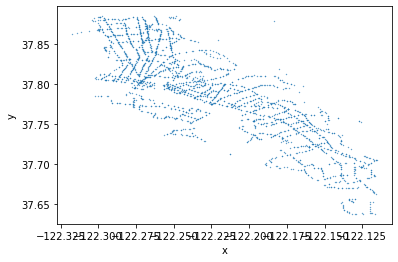

In [22]:
urbanaccess_net.transit_nodes.plot(kind='scatter', x='x', y='y', s=0.1)

In [23]:
nodes, edges = ua.osm.load.ua_network_from_bbox(bbox=bbox,
                                                remove_lcn=True)

Requesting network data within bounding box from Overpass API in 1 request(s)
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](37.63222600,-122.35588100,37.88472500,-122.11477500);>;);out;'}"
Downloaded 37,953.6KB from www.overpass-api.de in 10.09 seconds
Downloaded OSM network data within bounding box from Overpass API in 1 request(s) and 11.61 seconds
Returning OSM data with 234,418 nodes and 48,955 ways...
Edge node pairs completed. Took 88.63 seconds
Returning processed graph with 61,332 nodes and 171,886 edges...
Completed OSM data download and Pandana node and edge table creation in 107.60 seconds
checking for low connectivity nodes...
41 out of 61,332 nodes (0.07 percent of total) were identified as having low connectivity and have been removed.
Completed OSM data download and graph node and edge table c

In [24]:
ua.osm.network.create_osm_net(osm_edges=edges,
                              osm_nodes=nodes,
                              travel_speed_mph=3)

Created OSM network with travel time impedance using a travel speed of 3 MPH. Took 0.01 seconds


In [25]:
urbanaccess_net.osm_nodes.head()

x          y        id net_type
id                                                
30364114 -122.301088  37.822884  30364114     walk
30366199 -122.281347  37.828045  30366199     walk
30366200 -122.280475  37.828248  30366200     walk
30374146 -122.287497  37.802534  30374146     walk
33947074 -122.244472  37.863798  33947074     walk

In [26]:
urbanaccess_net.osm_edges.head()

from          to    distance  \
35718720   53139407      35718720    53139407    4.601450   
53139407   35718720      53139407    35718720    4.601450   
           2790624066    53139407  2790624066    6.820461   
2790624066 53139407    2790624066    53139407    6.820461   
           2790624087  2790624066  2790624087  111.511430   

                                            name  ref highway service bridge  \
35718720   53139407    Stonewall-Panoramic Trail  NaN   track     NaN    NaN   
53139407   35718720    Stonewall-Panoramic Trail  NaN   track     NaN    NaN   
           2790624066  Stonewall-Panoramic Trail  NaN   track     NaN    NaN   
2790624066 53139407    Stonewall-Panoramic Trail  NaN   track     NaN    NaN   
           2790624087  Stonewall-Panoramic Trail  NaN   track     NaN    NaN   

                      tunnel access oneway lanes maxspeed  hgv area width  \
35718720   53139407      NaN    NaN    NaN   NaN      NaN  NaN  NaN   NaN   
53139407   35718720      NaN    NaN    NaN   NaN      NaN  NaN  NaN   NaN   
           2790624066    NaN    NaN    NaN   NaN      NaN  NaN  NaN   NaN   
2790624066 53139407      NaN    NaN    NaN   NaN      NaN  NaN  NaN   NaN   
           2790624087    NaN    NaN    NaN   NaN      NaN  NaN  NaN   NaN   

                      est_width junction    weight net_type  
35718720   53139407         NaN      NaN  0.057184     walk  
53139407   35718720         NaN      NaN  0.057184     walk  
           2790624066       NaN      NaN  0.084761     walk  
2790624066 53139407         NaN      NaN  0.084761     walk  
           2790624087       NaN      NaN  1.385803     walk

<AxesSubplot:xlabel='x', ylabel='y'>

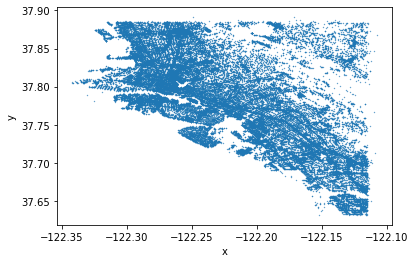

In [27]:
urbanaccess_net.osm_nodes.plot(kind='scatter', x='x', y='y', s=0.1)

In [28]:
ua.network.integrate_network(urbanaccess_network=urbanaccess_net,
                             headways=False)

Loaded UrbanAccess network components comprised of:
     Transit: 2,613 nodes and 32,605 edges;
     OSM: 61,291 nodes and 171,796 edges
Connector edges between the OSM and transit network nodes successfully completed. Took 1.53 seconds
Edge and node tables formatted for Pandana with integer node ids: id_int, to_int, and from_int. Took 3.64 seconds
Network edge and node network integration completed successfully resulting in a total of 63,904 nodes and 209,627 edges:
     Transit: 2,613 nodes 32,605 edges;
     OSM: 61,291 nodes 171,796 edges; and
     OSM/Transit connector: 5,226 edges.


In [29]:
urbanaccess_net.net_nodes.head()

id           x          y unique_agency_id  \
id_int                                                               
1       0100060_ac_transit -122.272992  37.768814       ac_transit   
2       0100070_ac_transit -122.272798  37.768993       ac_transit   
3       0100110_ac_transit -122.264015  37.780272       ac_transit   
4       0100170_ac_transit -122.270060  37.781066       ac_transit   
5       0100180_ac_transit -122.275281  37.779879       ac_transit   

        route_type  stop_id                     stop_name parent_station  \
id_int                                                                     
1              3.0  0100060             8th St:Portola Av            NaN   
2              3.0  0100070             8th St:Portola Av            NaN   
3              3.0  0100110             Atlantic Av:#1105            NaN   
4              3.0  0100170     Atlantic Av:Challenger Dr            NaN   
5              3.0  0100180  Atlantic Av:Constitution Way            NaN   

        stop_code  wheelchair_boarding zone_id  location_type net_type  
id_int                                                                  
1         52246.0                  NaN     NaN            NaN  transit  
2         57793.0                  NaN     NaN            NaN  transit  
3         56707.0                  NaN     NaN            NaN  transit  
4         57796.0                  NaN     NaN            NaN  transit  
5         50101.0                  NaN     NaN            NaN  transit

In [30]:
urbanaccess_net.net_edges.head()

from                           to  weight  \
0  FTVL_bay_area_rapid_transit  COLS_bay_area_rapid_transit     4.0   
1  COLS_bay_area_rapid_transit  SANL_bay_area_rapid_transit     4.0   
2  SANL_bay_area_rapid_transit  BAYF_bay_area_rapid_transit     3.0   
3  WOAK_bay_area_rapid_transit  LAKE_bay_area_rapid_transit     6.0   
4  LAKE_bay_area_rapid_transit  FTVL_bay_area_rapid_transit     3.0   

         unique_agency_id                 unique_trip_id  sequence  \
0  bay_area_rapid_transit  02DC10_bay_area_rapid_transit       1.0   
1  bay_area_rapid_transit  02DC10_bay_area_rapid_transit       2.0   
2  bay_area_rapid_transit  02DC10_bay_area_rapid_transit       3.0   
3  bay_area_rapid_transit  03DC10_bay_area_rapid_transit       1.0   
4  bay_area_rapid_transit  03DC10_bay_area_rapid_transit       2.0   

                           edge_id  route_type            unique_route_id  \
0  02DC10_bay_area_rapid_transit_1         1.0  05_bay_area_rapid_transit   
1  02DC10_bay_area_rapid_transit_2         1.0  05_bay_area_rapid_transit   
2  02DC10_bay_area_rapid_transit_3         1.0  05_bay_area_rapid_transit   
3  03DC10_bay_area_rapid_transit_1         1.0  05_bay_area_rapid_transit   
4  03DC10_bay_area_rapid_transit_2         1.0  05_bay_area_rapid_transit   

  net_type  ...  oneway lanes maxspeed  hgv area width est_width junction  \
0  transit  ...     nan   nan      nan  nan  nan   nan       nan      nan   
1  transit  ...     nan   nan      nan  nan  nan   nan       nan      nan   
2  transit  ...     nan   nan      nan  nan  nan   nan       nan      nan   
3  transit  ...     nan   nan      nan  nan  nan   nan       nan      nan   
4  transit  ...     nan   nan      nan  nan  nan   nan       nan      nan   

  from_int to_int  
0     2604   2602  
1     2602   2612  
2     2612   2601  
3     2613   2605  
4     2605   2604  

[5 rows x 28 columns]

In [31]:
urbanaccess_net.net_edges[urbanaccess_net.net_edges['net_type'] == 'transit'].head()

from                           to  weight  \
0  FTVL_bay_area_rapid_transit  COLS_bay_area_rapid_transit     4.0   
1  COLS_bay_area_rapid_transit  SANL_bay_area_rapid_transit     4.0   
2  SANL_bay_area_rapid_transit  BAYF_bay_area_rapid_transit     3.0   
3  WOAK_bay_area_rapid_transit  LAKE_bay_area_rapid_transit     6.0   
4  LAKE_bay_area_rapid_transit  FTVL_bay_area_rapid_transit     3.0   

         unique_agency_id                 unique_trip_id  sequence  \
0  bay_area_rapid_transit  02DC10_bay_area_rapid_transit       1.0   
1  bay_area_rapid_transit  02DC10_bay_area_rapid_transit       2.0   
2  bay_area_rapid_transit  02DC10_bay_area_rapid_transit       3.0   
3  bay_area_rapid_transit  03DC10_bay_area_rapid_transit       1.0   
4  bay_area_rapid_transit  03DC10_bay_area_rapid_transit       2.0   

                           edge_id  route_type            unique_route_id  \
0  02DC10_bay_area_rapid_transit_1         1.0  05_bay_area_rapid_transit   
1  02DC10_bay_area_rapid_transit_2         1.0  05_bay_area_rapid_transit   
2  02DC10_bay_area_rapid_transit_3         1.0  05_bay_area_rapid_transit   
3  03DC10_bay_area_rapid_transit_1         1.0  05_bay_area_rapid_transit   
4  03DC10_bay_area_rapid_transit_2         1.0  05_bay_area_rapid_transit   

  net_type  ...  oneway lanes maxspeed  hgv area width est_width junction  \
0  transit  ...     nan   nan      nan  nan  nan   nan       nan      nan   
1  transit  ...     nan   nan      nan  nan  nan   nan       nan      nan   
2  transit  ...     nan   nan      nan  nan  nan   nan       nan      nan   
3  transit  ...     nan   nan      nan  nan  nan   nan       nan      nan   
4  transit  ...     nan   nan      nan  nan  nan   nan       nan      nan   

  from_int to_int  
0     2604   2602  
1     2602   2612  
2     2612   2601  
3     2613   2605  
4     2605   2604  

[5 rows x 28 columns]

In [32]:
ua.network.save_network(urbanaccess_network=urbanaccess_net,
                        filename='final_net.h5',
                        overwrite_key = True)

New final_net.h5 hdf5 store created in dir: data
edges saved in data/final_net.h5 hdf5 store.
Using existing data/final_net.h5 hdf5 store.
nodes saved in data/final_net.h5 hdf5 store.


Figure created. Took 26.04 seconds


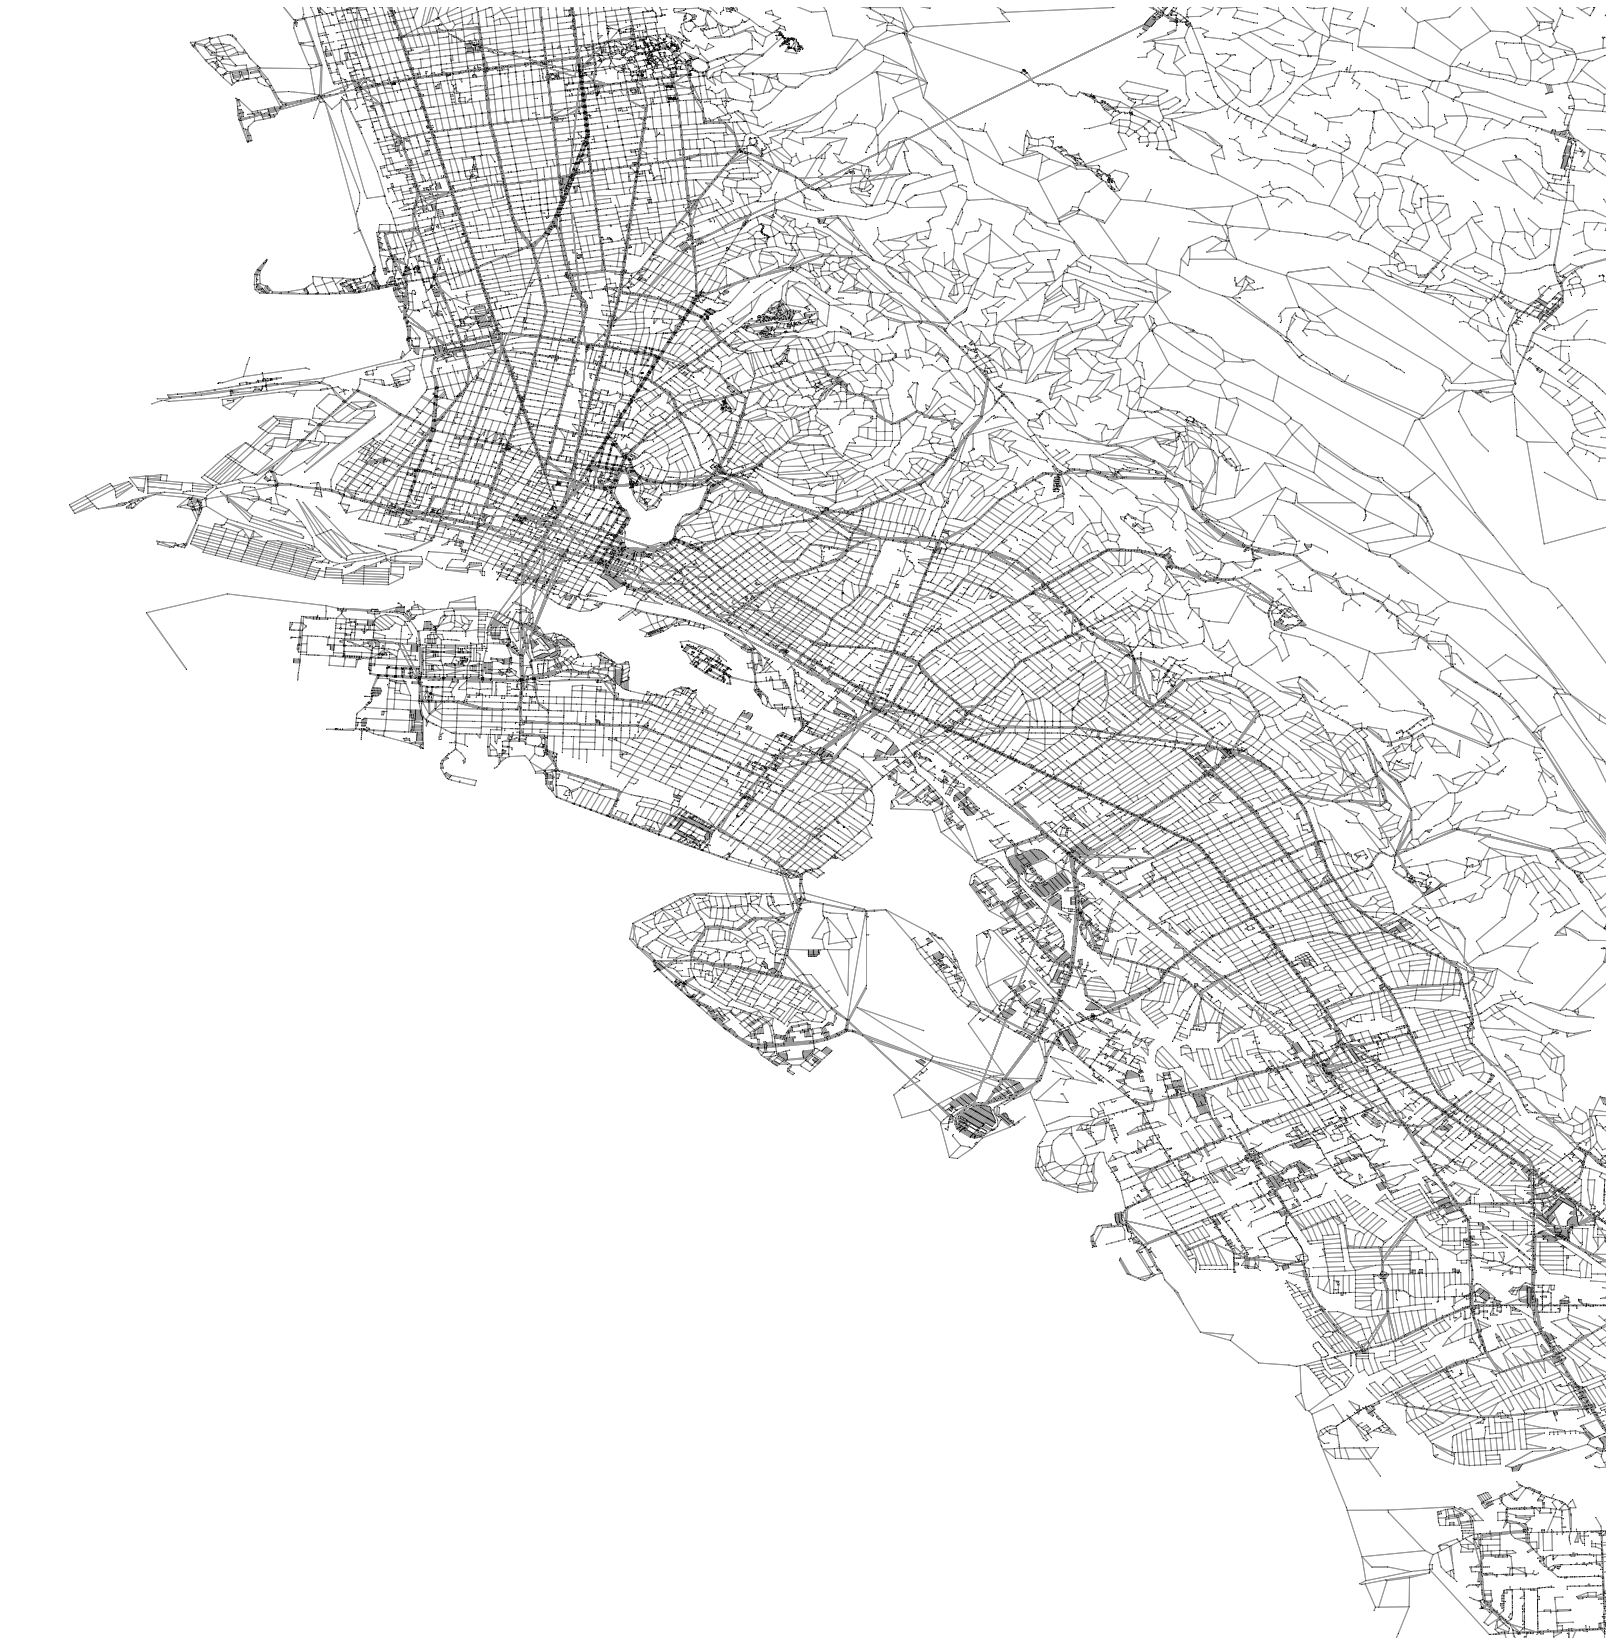

(<Figure size 2062.54x2160 with 1 Axes>, <AxesSubplot:>)

In [33]:
ua.plot.plot_net(nodes=urbanaccess_net.net_nodes,
                 edges=urbanaccess_net.net_edges,
                 bbox=bbox,
                 fig_height=30, margin=0.02,
                 edge_color='#999999', edge_linewidth=1, edge_alpha=1,
                 node_color='black', node_size=1.1, node_alpha=1, node_edgecolor='none', node_zorder=3, nodes_only=False)

Figure created. Took 21.39 seconds


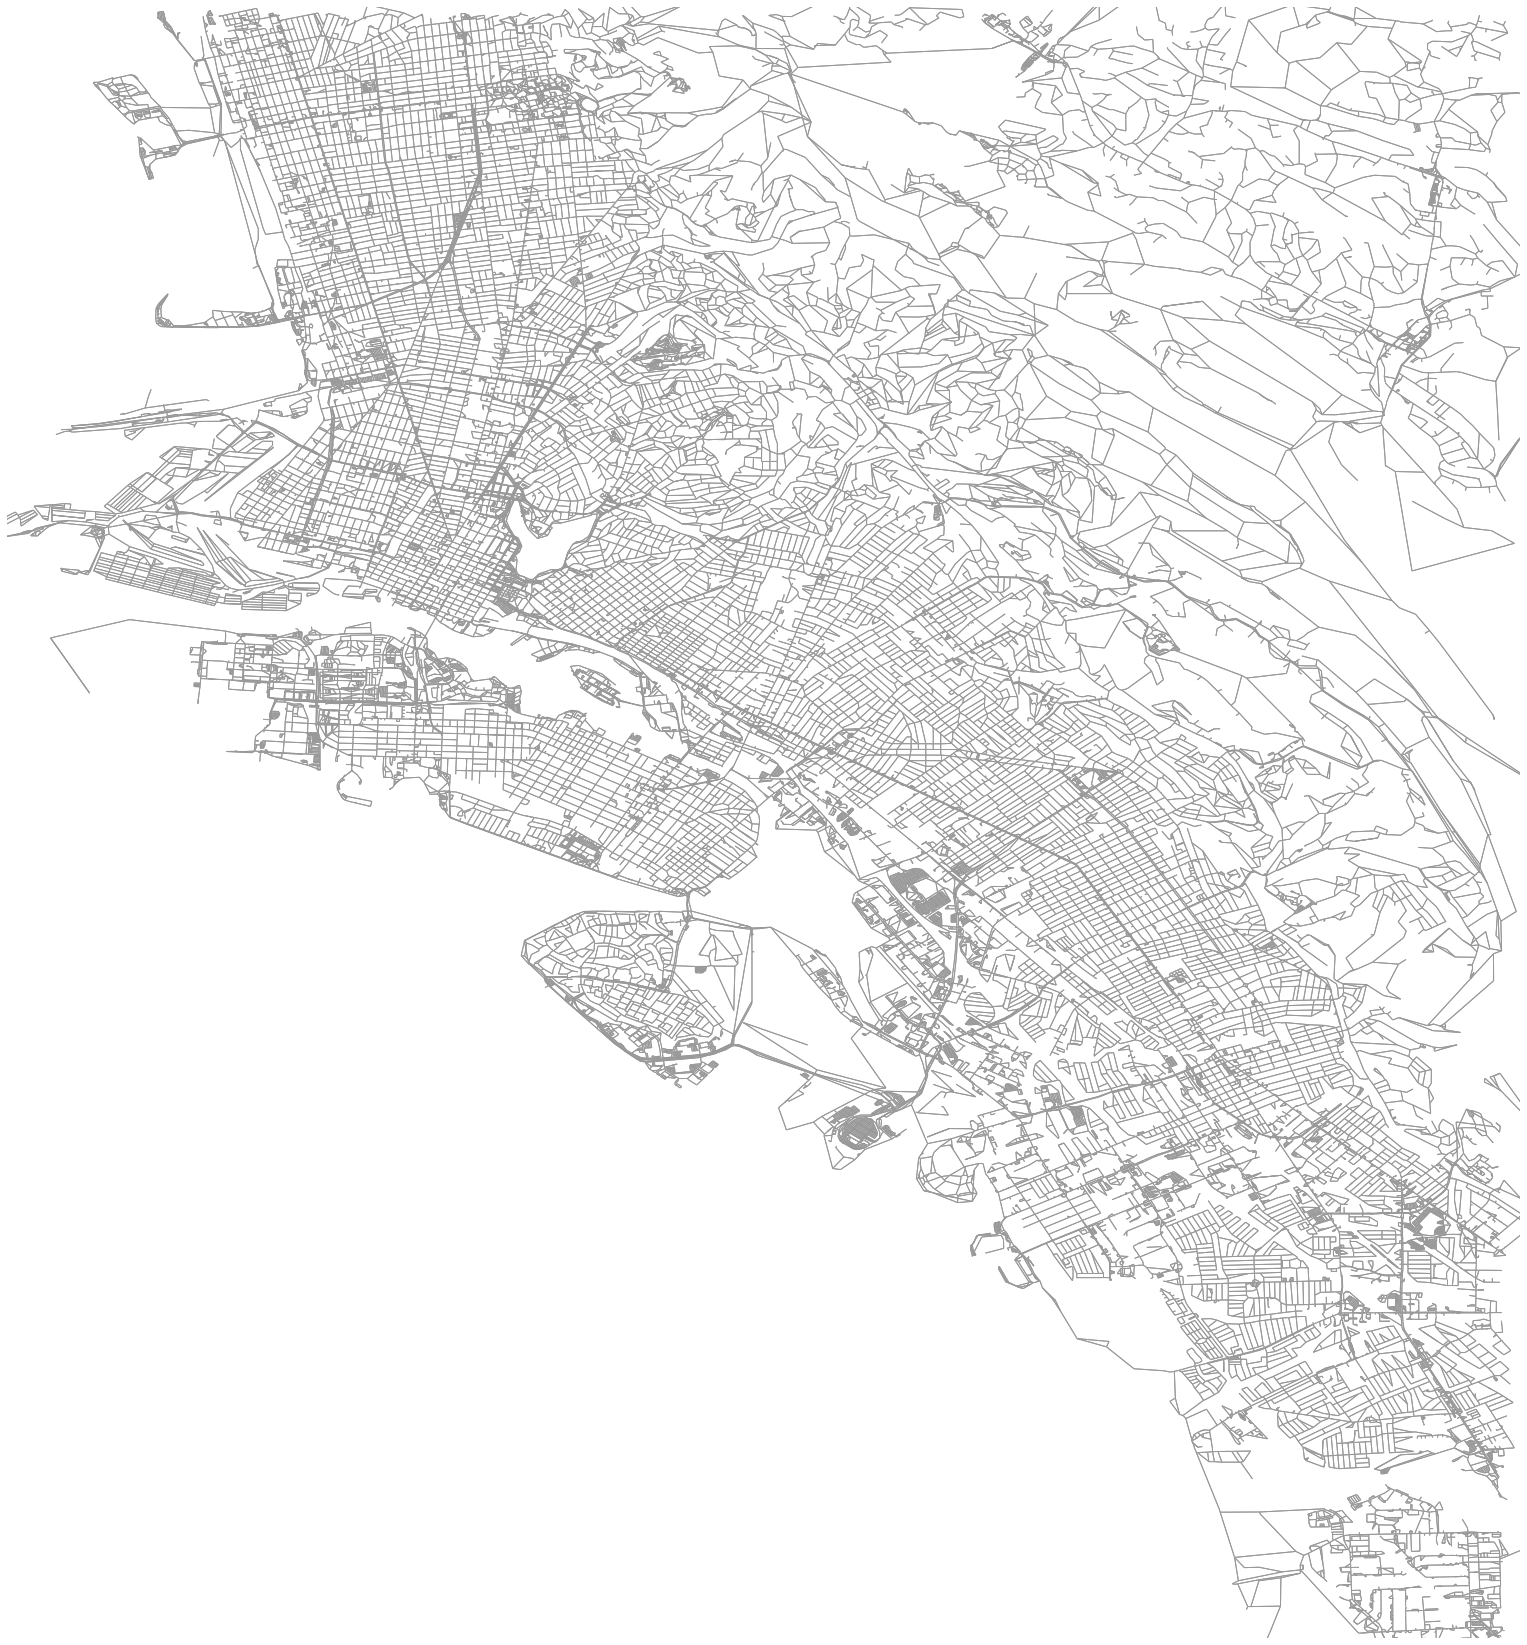

(<Figure size 1952.49x2160 with 1 Axes>, <AxesSubplot:>)

In [34]:
ua.plot.plot_net(nodes=urbanaccess_net.net_nodes,
                 edges=urbanaccess_net.net_edges[urbanaccess_net.net_edges['net_type']=='walk'],
                 bbox=None,
                 fig_height=30, margin=0.02,
                 edge_color='#999999', edge_linewidth=1, edge_alpha=1,
                 node_color='black', node_size=0, node_alpha=1, node_edgecolor='none', node_zorder=3, nodes_only=False)

In [35]:
urbanaccess_net.net_edges['unique_route_id'].unique()

array(['05_bay_area_rapid_transit', '07_bay_area_rapid_transit',
       '11_bay_area_rapid_transit', '03_bay_area_rapid_transit',
       '01_bay_area_rapid_transit', '19_bay_area_rapid_transit',
       'J-141_ac_transit', '65-141_ac_transit', '88-141_ac_transit',
       '52-141_ac_transit', 'F-141_ac_transit', '72M-141_ac_transit',
       '72-141_ac_transit', '51B-141_ac_transit', 'BSD-141_ac_transit',
       'E-141_ac_transit', 'C-141_ac_transit', 'P-141_ac_transit',
       'B-141_ac_transit', 'CB-141_ac_transit', '18-141_ac_transit',
       '29-141_ac_transit', '36-141_ac_transit', '79-141_ac_transit',
       '80-141_ac_transit', '81-141_ac_transit', '12-141_ac_transit',
       '33-141_ac_transit', '96-141_ac_transit', '72R-141_ac_transit',
       '19-141_ac_transit', 'V-141_ac_transit', 'W-141_ac_transit',
       '54-141_ac_transit', '47-141_ac_transit', '339-141_ac_transit',
       '46-141_ac_transit', '73-141_ac_transit', '20-141_ac_transit',
       '21-141_ac_transit', '51A-141_a

Figure created. Took 0.10 seconds


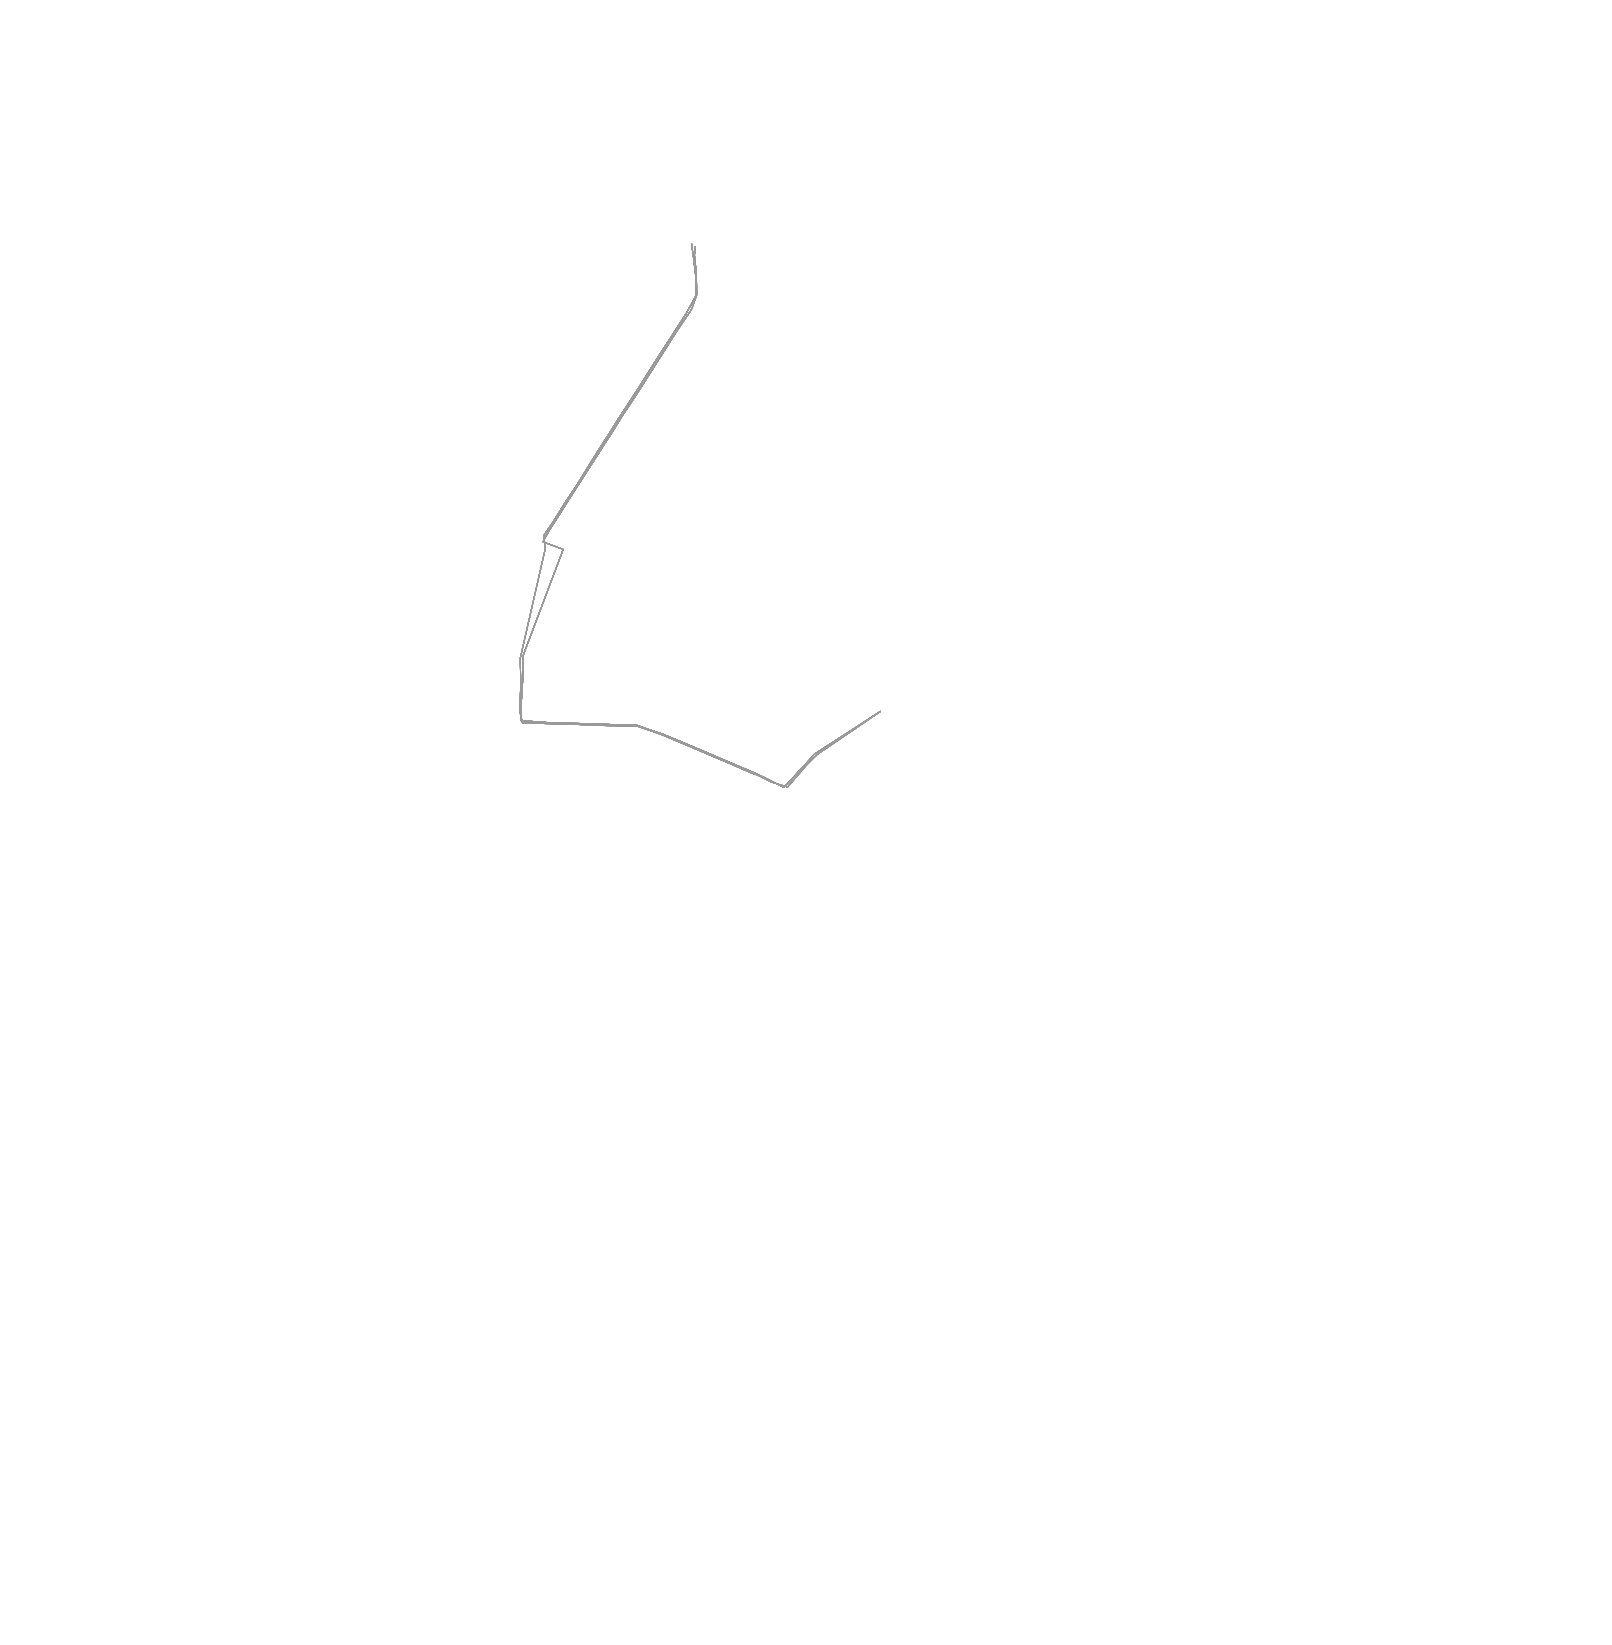

(<Figure size 2062.54x2160 with 1 Axes>, <AxesSubplot:>)

In [36]:
ua.plot.plot_net(nodes=urbanaccess_net.net_nodes,
                 edges=urbanaccess_net.net_edges[urbanaccess_net.net_edges['unique_route_id']=='51A-141_ac_transit'],
                 bbox=bbox,
                 fig_height=30, margin=0.02,
                 edge_color='#999999', edge_linewidth=1, edge_alpha=1,
                 node_color='black', node_size=0, node_alpha=1, node_edgecolor='none', node_zorder=3, nodes_only=False)

In [37]:
urbanaccess_net.net_edges['unique_agency_id'].unique()

array(['bay_area_rapid_transit', 'ac_transit', 'nan'], dtype=object)

Figure created. Took 0.09 seconds


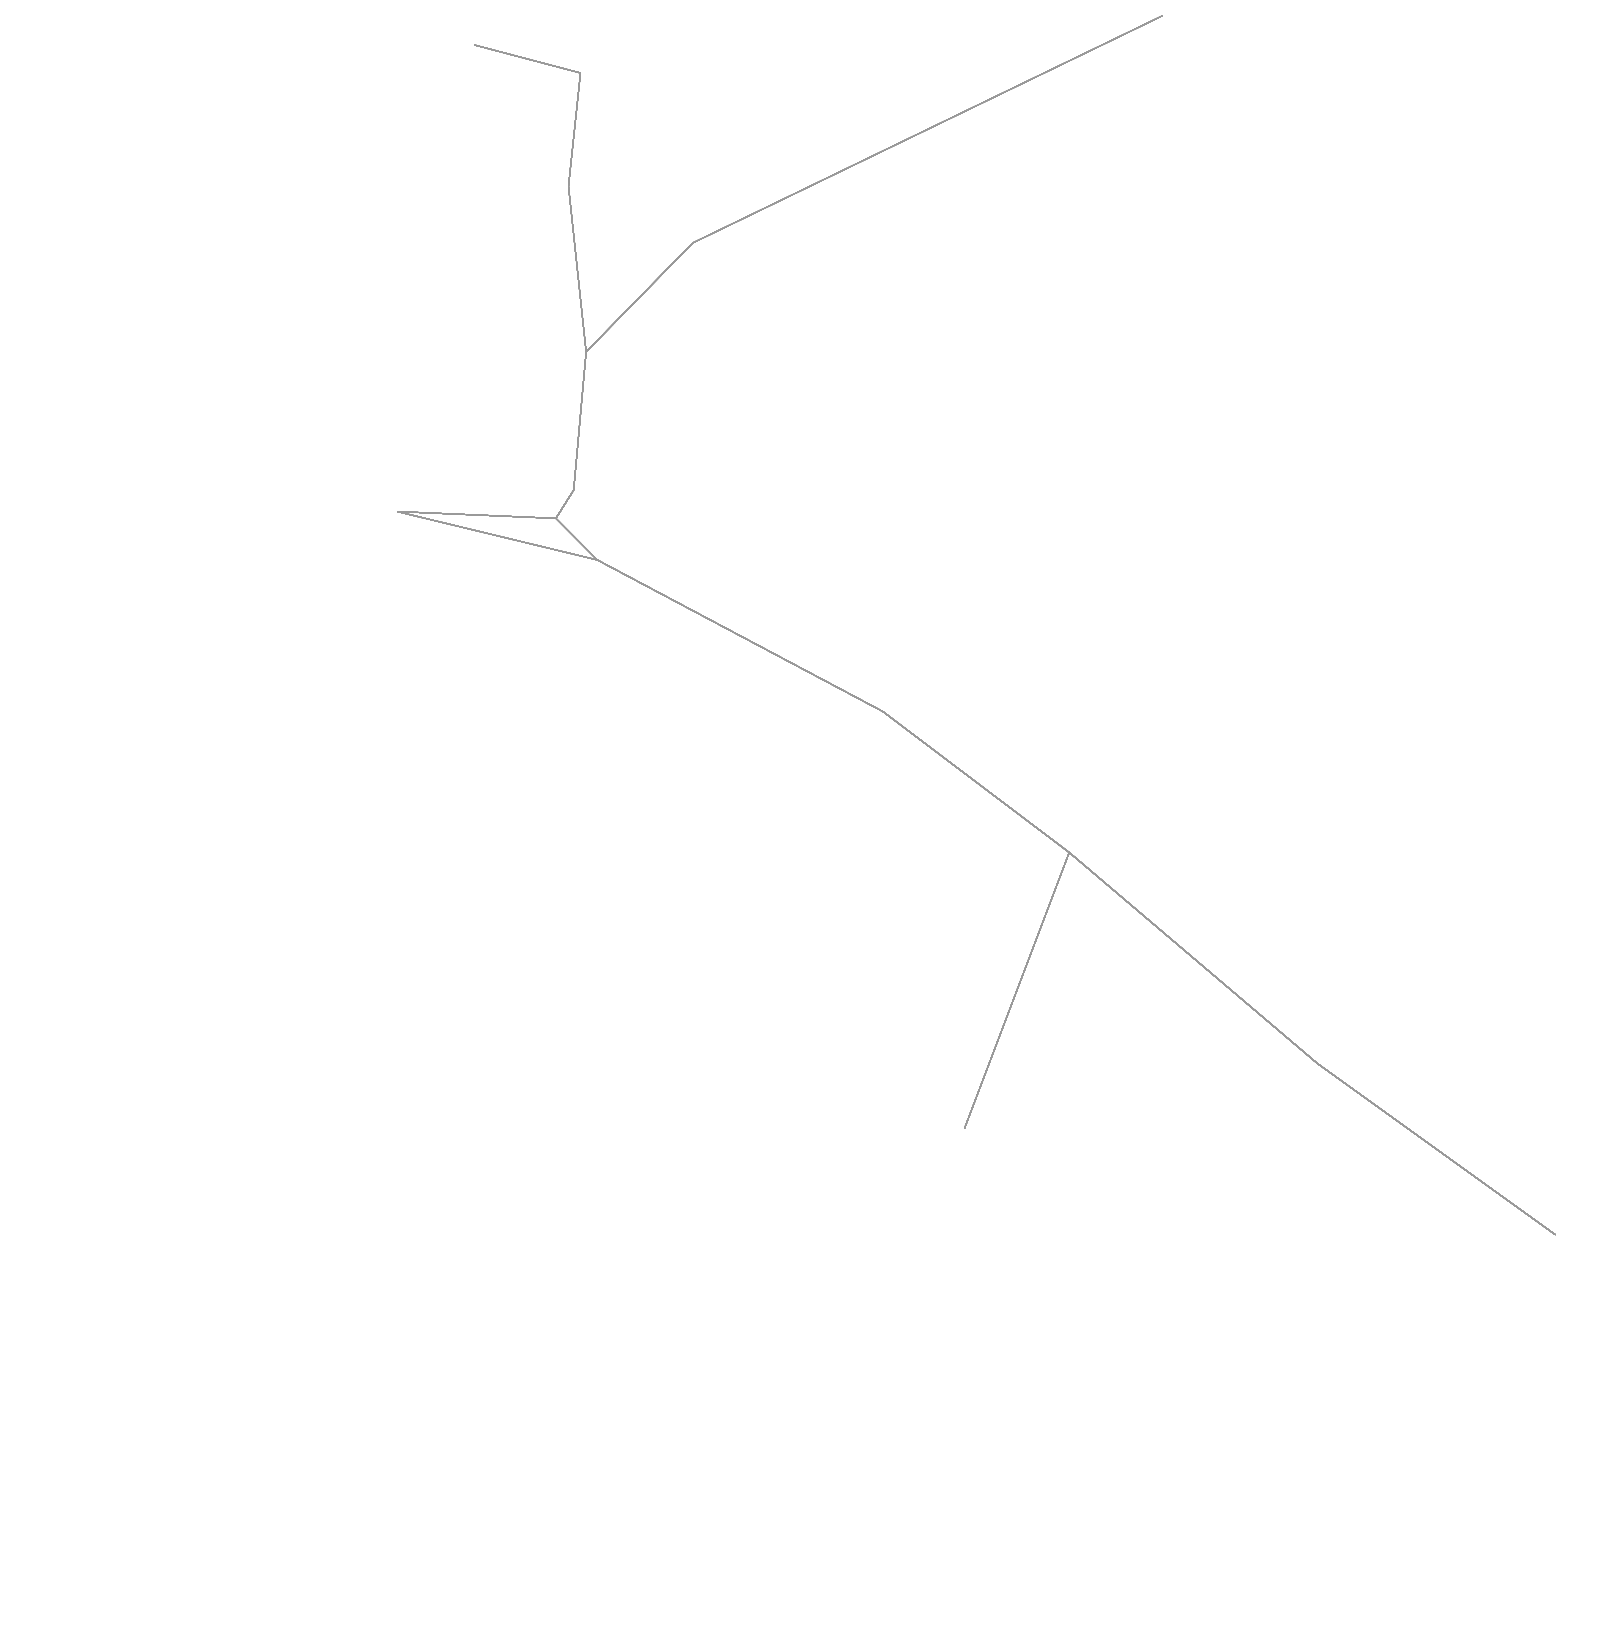

(<Figure size 2062.54x2160 with 1 Axes>, <AxesSubplot:>)

In [38]:
ua.plot.plot_net(nodes=urbanaccess_net.net_nodes,
                 edges=urbanaccess_net.net_edges[urbanaccess_net.net_edges['unique_agency_id']=='bay_area_rapid_transit'],
                 bbox=bbox,
                 fig_height=30, margin=0.02,
                 edge_color='#999999', edge_linewidth=1, edge_alpha=1,
                 node_color='black', node_size=0, node_alpha=1, node_edgecolor='none', node_zorder=3, nodes_only=False)

In [39]:
ua.gtfs.headways.headways(gtfsfeeds_df=loaded_feeds,
                          headway_timerange=['07:00:00','10:00:00'])

Stop times from 07:00:00 to 10:00:00 successfully selected 33,947 records out of 185,724 total records (18.28 percent of total). Took 0.01 seconds
Starting route stop headway calculation for 3,708 route stops...
Route stop headway calculation complete. Took 9.63 seconds
headway calculation complete. Took 10.15 seconds


In [40]:
loaded_feeds.headways.head()

count       mean       std        min   25%   50%   75%   max  \
15658    5.0  29.863333  0.305596  29.316667  30.0  30.0  30.0  30.0   
15701    5.0  29.863333  0.305596  29.316667  30.0  30.0  30.0  30.0   
15744    5.0  29.863333  0.305596  29.316667  30.0  30.0  30.0  30.0   
16043    5.0  29.863333  0.305596  29.316667  30.0  30.0  30.0  30.0   
16086    5.0  29.863333  0.305596  29.316667  30.0  30.0  30.0  30.0   

           unique_stop_id    unique_route_id  \
15658  0100060_ac_transit  20-141_ac_transit   
15701  0100060_ac_transit  20-141_ac_transit   
15744  0100060_ac_transit  20-141_ac_transit   
16043  0100060_ac_transit  20-141_ac_transit   
16086  0100060_ac_transit  20-141_ac_transit   

                              node_id_route  
15658  0100060_ac_transit_20-141_ac_transit  
15701  0100060_ac_transit_20-141_ac_transit  
15744  0100060_ac_transit_20-141_ac_transit  
16043  0100060_ac_transit_20-141_ac_transit  
16086  0100060_ac_transit_20-141_ac_transit

In [41]:
ua.network.integrate_network(urbanaccess_network=urbanaccess_net,
                             headways=True,
                             urbanaccess_gtfsfeeds_df=loaded_feeds,
                             headway_statistic='mean')

Loaded UrbanAccess network components comprised of:
     Transit: 2,613 nodes and 32,605 edges;
     OSM: 61,291 nodes and 171,796 edges
routes successfully joined to transit nodes. Took 0.04 seconds
Connector edges between the OSM and transit network nodes successfully completed. Took 2.32 seconds
mean route stop headway will be used for pedestrian to transit edge impedance.
Headway impedance calculation completed. Took 0.05 seconds
Edge and node tables formatted for Pandana with integer node ids: id_int, to_int, and from_int. Took 4.73 seconds
Network edge and node network integration completed successfully resulting in a total of 64,994 nodes and 242,025 edges:
     Transit: 3,703 nodes 32,605 edges;
     OSM: 61,291 nodes 171,796 edges; and
     OSM/Transit connector: 37,624 edges.


Figure created. Took 33.37 seconds


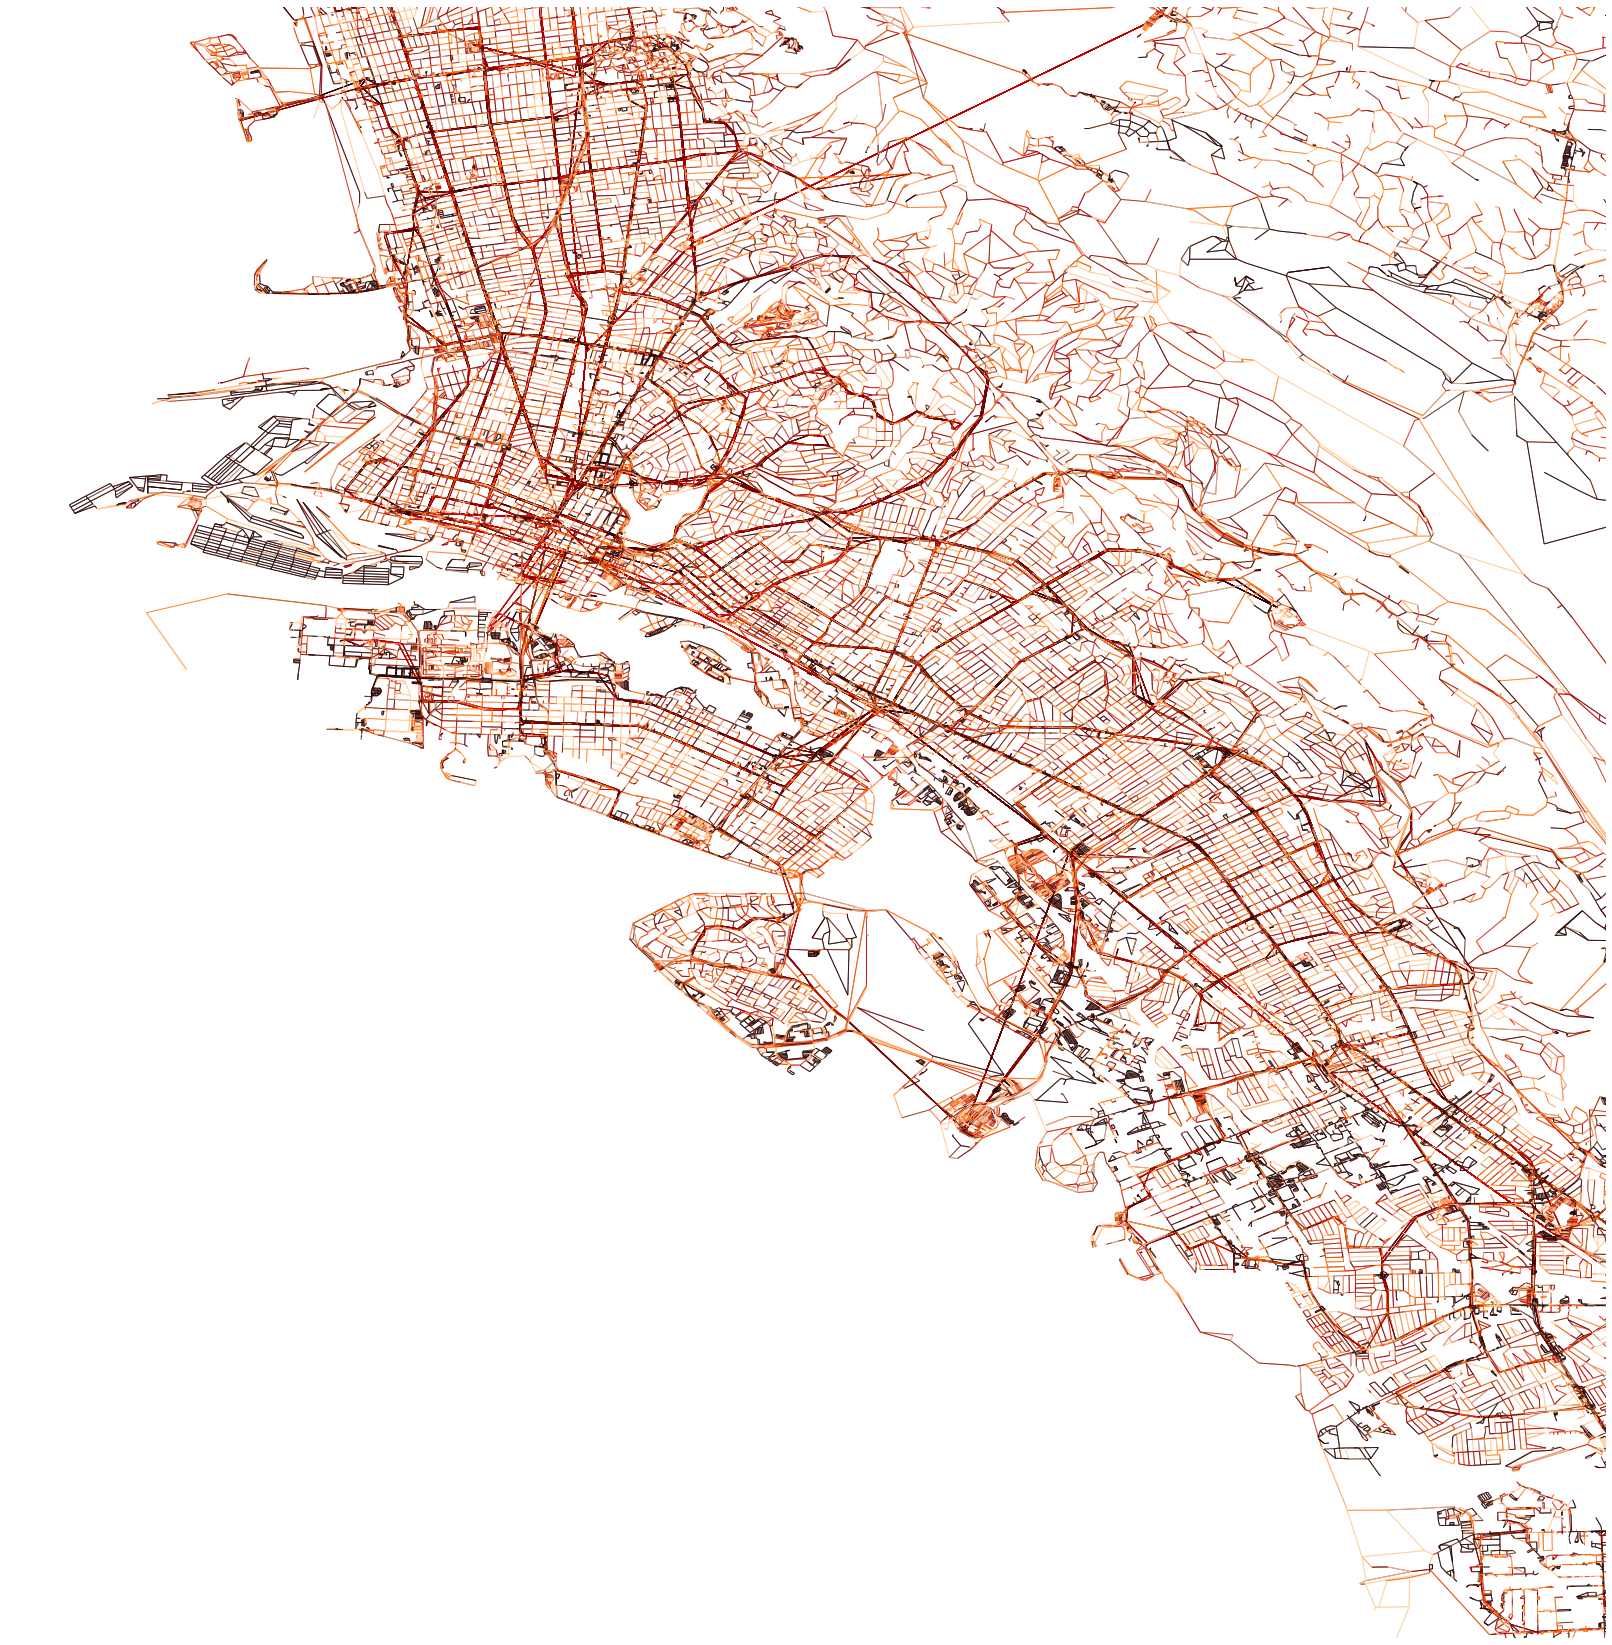

(<Figure size 2062.54x2160 with 1 Axes>, <AxesSubplot:>)

In [42]:
edgecolor = ua.plot.col_colors(df=urbanaccess_net.net_edges, col='weight', cmap='gist_heat_r', num_bins=5)
ua.plot.plot_net(nodes=urbanaccess_net.net_nodes,
                 edges=urbanaccess_net.net_edges,
                 bbox=bbox,
                 fig_height=30, margin=0.02,
                 edge_color=edgecolor, edge_linewidth=1, edge_alpha=0.7,
                 node_color='black', node_size=0, node_alpha=1, node_edgecolor='none', node_zorder=3, nodes_only=False)

In [45]:
blocks = pd.read_hdf('C:/Users/adria/Downloads/bay_area_demo_data.h5','blocks')
# remove blocks that contain all water
blocks = blocks[blocks['square_meters_land'] != 0]
print('Total number of blocks: {:,}'.format(len(blocks)))
blocks.head()

Total number of blocks: 107,080


x          y  res_rents  res_values  \
060014001001000 -122.231654  37.879012     2201.1   1100001.1   
060014001001001 -122.234077  37.881846     2201.1   1100001.1   
060014001001002 -122.229372  37.880514     2201.1   1100001.1   
060014001001003 -122.239048  37.883088     2201.1   1100001.1   
060014001001004 -122.238373  37.882880     2201.1   1100001.1   

                 square_meters_land  households  persons  workers  children  \
060014001001000              590336         0.0      0.0      0.0       0.0   
060014001001001               22089         0.0      0.0      0.0       0.0   
060014001001002                9433         0.0      0.0      0.0       0.0   
060014001001003                1354         0.0      0.0      0.0       0.0   
060014001001004                7977         0.0      0.0      0.0       0.0   

                 cars  ...   62   61   53   72   92  4849   55   22   11   21  
060014001001000   0.0  ...  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  
060014001001001   0.0  ...  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  
060014001001002   0.0  ...  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  
060014001001003   0.0  ...  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  
060014001001004   0.0  ...  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  

[5 rows x 32 columns]

In [46]:
lng_max, lat_min, lng_min, lat_max = bbox
outside_bbox = blocks.loc[~(((lng_max < blocks["x"]) & (blocks["x"] < lng_min)) & ((lat_min < blocks["y"]) & (blocks["y"] < lat_max)))]
blocks_subset = blocks.drop(outside_bbox.index)
print('Total number of subset blocks: {:,}'.format(len(blocks_subset)))

Total number of subset blocks: 11,824


<AxesSubplot:xlabel='x', ylabel='y'>

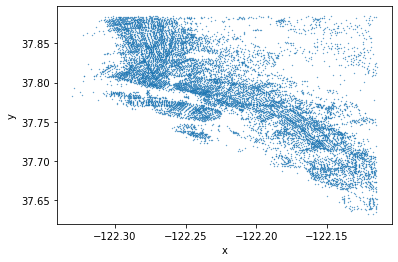

In [47]:
blocks_subset.plot(kind='scatter', x='x', y='y', s=0.1)

In [48]:
s_time = time.time()
transit_ped_net = pdna.Network(urbanaccess_net.net_nodes["x"],
                               urbanaccess_net.net_nodes["y"],
                               urbanaccess_net.net_edges["from_int"],
                               urbanaccess_net.net_edges["to_int"],
                               urbanaccess_net.net_edges[["weight"]], 
                               twoway=False)
print('Took {:,.2f} seconds'.format(time.time() - s_time))

Took 32.78 seconds


In [49]:
blocks_subset['node_id'] = transit_ped_net.get_node_ids(blocks_subset['x'], blocks_subset['y'])

In [50]:
transit_ped_net.set(blocks_subset.node_id, variable = blocks_subset.jobs, name='jobs')

In [51]:
s_time = time.time()
jobs_45 = transit_ped_net.aggregate(45, type='sum', decay='linear', name='jobs')
jobs_30 = transit_ped_net.aggregate(30, type='sum', decay='linear', name='jobs')
jobs_15 = transit_ped_net.aggregate(15, type='sum', decay='linear', name='jobs')
print('Took {:,.2f} seconds'.format(time.time() - s_time))

Took 73.48 seconds


In [52]:
print(jobs_45.head())
print(jobs_30.head())
print(jobs_15.head())

id_int
1    129318.631207
2    123442.286052
3    105049.367076
4    129128.788297
5    139187.134740
dtype: float64
id_int
1    63296.310239
2    56997.835502
3    42348.064689
4    66397.714378
5    74291.632784
dtype: float64
id_int
1     8594.334431
2     7492.178145
3     5375.601029
4    14490.713279
5    16375.097394
dtype: float64


Took 0.53 seconds


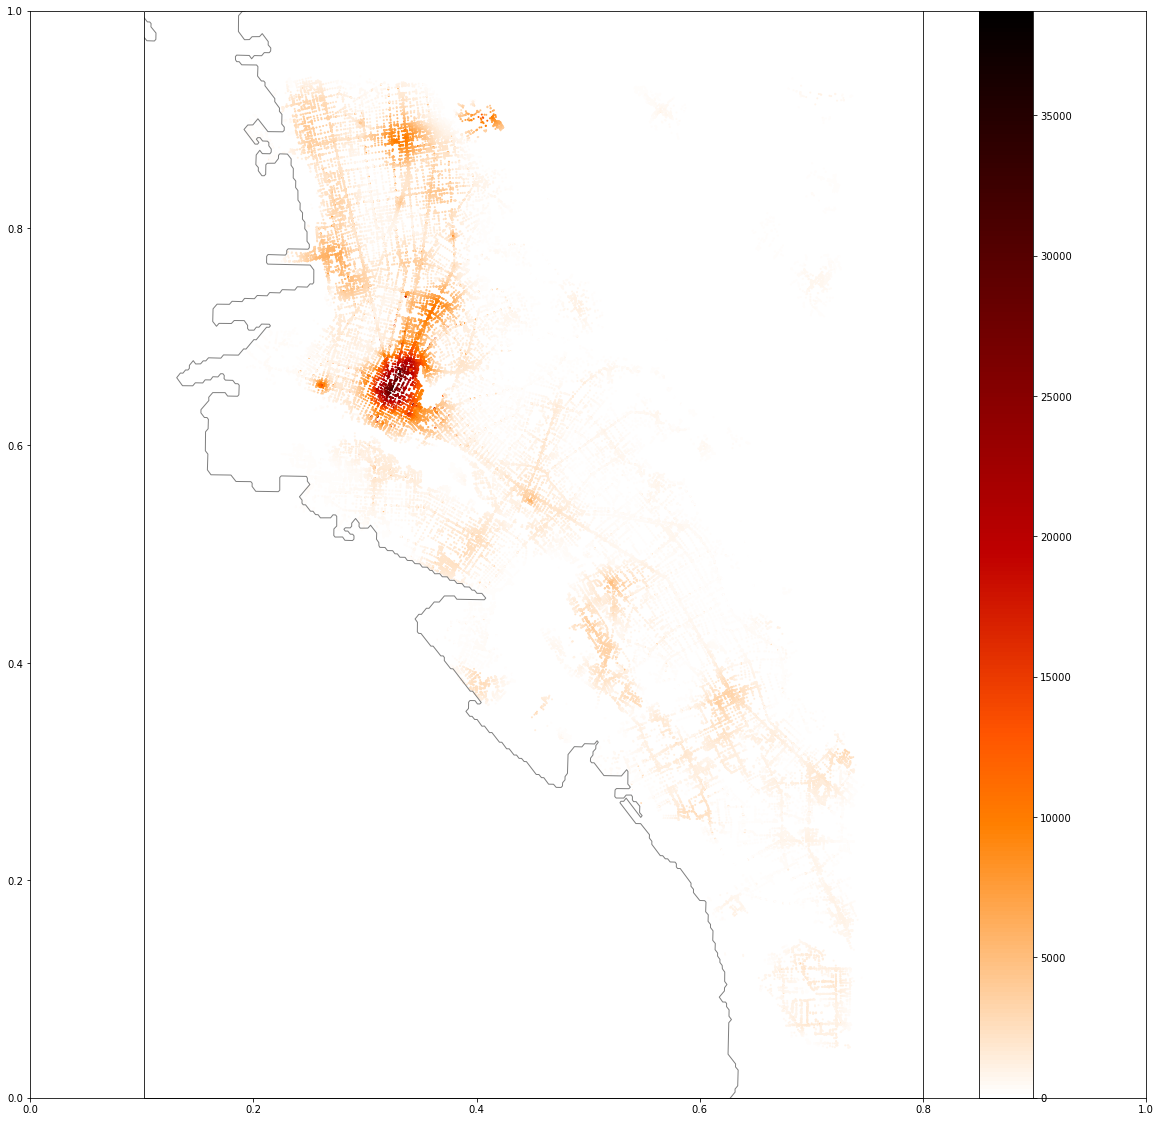

In [54]:
s_time = time.time()

fig = plt.subplots(figsize=(20,20))

data_crs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.epsg(26943))
ax.add_feature(cartopy.feature.GSHHSFeature(scale='full'), edgecolor='grey')

plt.scatter(transit_ped_net.nodes_df.x, transit_ped_net.nodes_df.y, 
            c=jobs_15, s=4, cmap='gist_heat_r', edgecolor='none', transform=data_crs)
cb = plt.colorbar()

print('Took {:,.2f} seconds'.format(time.time() - s_time))

Took 0.60 seconds


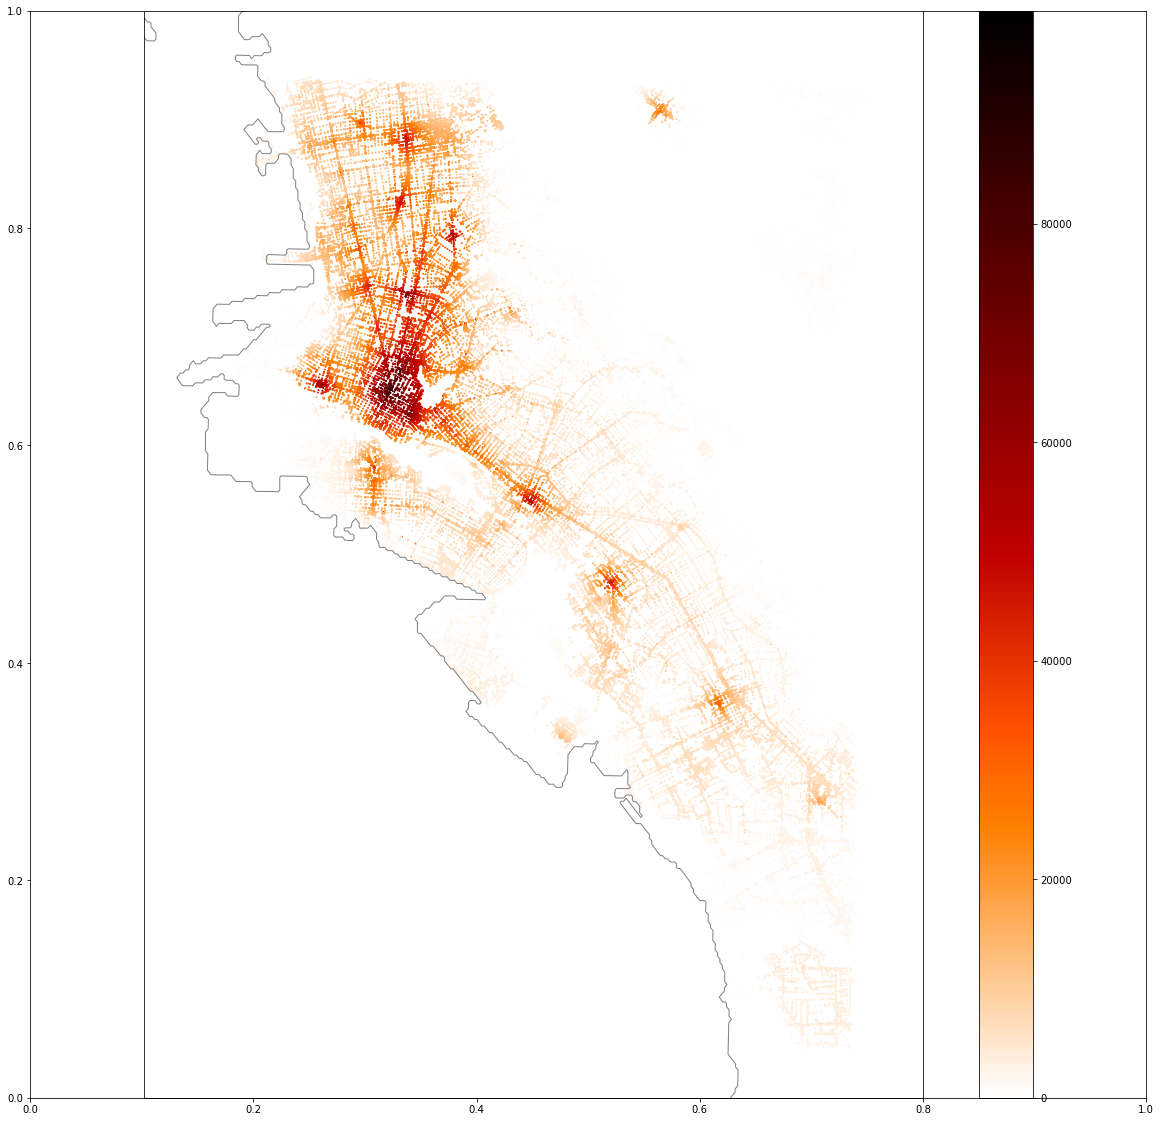

In [55]:
s_time = time.time()

fig = plt.subplots(figsize=(20,20))

data_crs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.epsg(26943))
ax.add_feature(cartopy.feature.GSHHSFeature(scale='full'), edgecolor='grey')

plt.scatter(transit_ped_net.nodes_df.x, transit_ped_net.nodes_df.y, 
            c=jobs_30, s=4, cmap='gist_heat_r', edgecolor='none', transform=data_crs)
cb = plt.colorbar()

print('Took {:,.2f} seconds'.format(time.time() - s_time))

Took 0.75 seconds


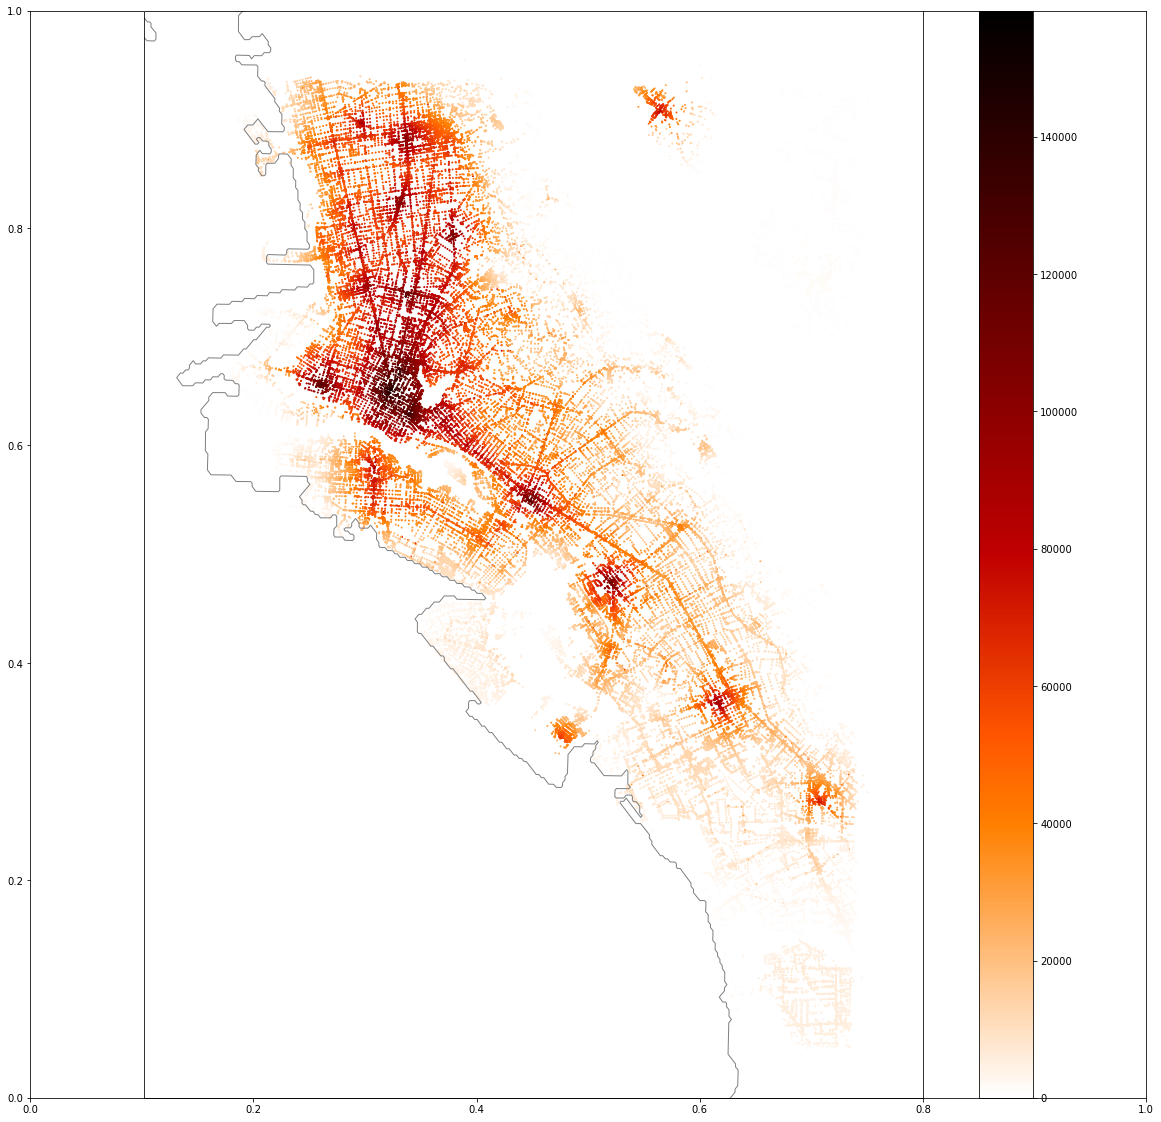

In [56]:
s_time = time.time()

fig = plt.subplots(figsize=(20,20))

data_crs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.epsg(26943))
ax.add_feature(cartopy.feature.GSHHSFeature(scale='full'), edgecolor='grey')

plt.scatter(transit_ped_net.nodes_df.x, transit_ped_net.nodes_df.y, 
            c=jobs_45, s=4, cmap='gist_heat_r', edgecolor='none', transform=data_crs)
cb = plt.colorbar()

print('Took {:,.2f} seconds'.format(time.time() - s_time))